In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

dfcurrent = pd.read_csv('CurrentMVP.csv')
print(dfcurrent.columns)
dfcurrent.head()

Index(['Rank', 'Player', 'Age', 'Tm', 'G', 'Team Wins', 'Overall Seed', 'MP',
       'PPG', 'RPG', 'APG', 'SPG', 'BPG', 'eFG%', '3P%', 'FT%', 'WS', 'WS/48',
       'VORP', 'BPM', 'G-Unadjusted', 'Wins-Unadjusted', 'WS-Unadjusted',
       'VORP-Unadjusted', 'Total Games'],
      dtype='object')


,Rank,Player,Age,Tm,G,Team Wins,Overall Seed,MP,PPG,RPG,...,FT%,WS,WS/48,VORP,BPM,G-Unadjusted,Wins-Unadjusted,WS-Unadjusted,VORP-Unadjusted,Total Games
0,1,Nikola Jokić,26,DEN,82.000000,48.809524,8,35.8,27.1,11.2,...,0.866,18.938095,0.310,10.347619,11.9,42,25,9.7,5.3,42
1,2,Joel Embiid,27,PHI,59.116279,57.209302,1,32.6,29.9,11.5,...,0.859,11.823256,0.294,5.148837,8.6,31,30,6.2,2.7,43
2,3,Giannis Antetokounmpo,26,MIL,80.000000,54.000000,7,34.2,29.0,11.7,...,0.679,14.200000,0.250,13.200000,11.5,40,27,7.1,6.6,41
3,4,James Harden,31,BRK,70.558140,55.302326,3,37.9,25.3,8.0,...,0.866,11.823256,0.211,5.720930,6.5,37,29,6.2,3.0,43
4,5,Damian Lillard,30,POR,80.047619,48.809524,9,36.0,30.3,4.4,...,0.940,13.080952,0.217,6.052381,6.3,41,25,6.7,3.1,42


In [19]:
advert = pd.read_csv('NBA2024.csv')
dfnba2024 = pd.read_csv('NBA2024.csv')
print(dfnba2024.columns)
advert.head()

Index(['RANK', 'NAME', 'TEAM', 'POS', 'AGE', 'GP', 'MPG', 'USG%', 'TO%', 'FTA',
       'FT%', '2PA', '2P%', '3PA', '3P%', 'eFG%', 'TS%', 'PPG', 'RPG', 'APG',
       'SPG', 'BPG', 'TPG', 'P+R', 'P+A', 'P+R+A', 'VI', 'ORtg', 'DRtg'],
      dtype='object')


,RANK,NAME,TEAM,POS,AGE,GP,MPG,USG%,TO%,FTA,...,APG,SPG,BPG,TPG,P+R,P+A,P+R+A,VI,ORtg,DRtg
0,NaN,Joel Embiid,Phi,C,30.0,34,34.0,39.2,14.3,403,...,5.7,1.1,1.8,3.7,46.6,41.0,52.3,15.5,125.2,106.0
1,NaN,Luka Doncic,Dal,G,25.0,57,37.5,36.0,14.2,510,...,9.9,1.5,0.6,3.9,43.6,44.4,53.5,15.6,123.6,111.9
2,NaN,Shai Gilgeous-Alexander,Okc,G,25.7,64,34.4,33.1,9.7,564,...,6.4,2.1,1.0,2.2,36.7,37.5,43.1,12.1,130.7,107.8
3,NaN,Giannis Antetokounmpo,Mil,F,29.3,63,35.0,33.0,15.3,696,...,6.4,1.2,1.0,3.4,42.0,37.2,48.4,14.9,126.5,106.9
4,NaN,Kevin Durant,Pho,F,35.5,58,37.3,29.8,14.6,376,...,5.5,0.9,1.3,3.3,35.2,33.9,40.7,10.9,120.1,113.0


In [20]:
dfnba2022 = pd.read_csv('nba2022.csv')
print(dfnba2022.columns)
dfnba2022.head()

Index(['RANK', 'Rank', 'NAME', 'TEAM', 'POS', 'AGE', 'GP', 'MPG', 'USG%',
       'TO%', 'FTA', 'FT%', '2PA', '2P%', '3PA', '3P%', 'eFG%', 'TS%', 'PPG',
       'RPG', 'APG', 'SPG', 'BPG', 'TPG', 'P+R', 'P+A', 'P+R+A', 'VI', 'ORtg',
       'DRtg'],
      dtype='object')


,RANK,Rank,NAME,TEAM,POS,AGE,GP,MPG,USG%,TO%,...,APG,SPG,BPG,TPG,P+R,P+A,P+R+A,VI,ORtg,DRtg
0,NaN,1,Joel Embiid,Phi,C-F,29.1,66,34.6,37.0,14.5,...,4.2,1.0,1.7,3.4,43.2,37.2,47.4,13.0,124.4,104.1
1,NaN,2,Luka Doncic,Dal,F-G,24.1,66,36.2,37.7,14.0,...,8.0,1.4,0.5,3.6,41.0,40.4,49.0,14.4,120.0,109.2
2,NaN,3,Damian Lillard,Por,G,32.7,58,36.3,33.8,13.7,...,7.3,0.9,0.3,3.3,36.9,39.5,44.3,11.5,126.4,117.6
3,NaN,4,Shai Gilgeous-Alexander,Okc,G-F,24.7,68,35.5,32.8,12.2,...,5.5,1.6,1.0,2.8,36.2,36.9,41.7,10.6,124.9,109.8
4,NaN,5,Giannis Antetokounmpo,Mil,F,28.3,63,32.1,38.8,16.2,...,5.7,0.8,0.8,3.9,42.9,36.8,48.6,15.9,116.8,100.6


In [21]:
train, test = train_test_split(dfnba2022, test_size = 0.25, random_state = 10)

xtrain = train[['MPG', 'TO%', 'FTA','FT%', '2PA', '2P%', '3PA', '3P%', 'PPG', 'RPG', 'APG','SPG', 'BPG', 'TPG']]
ytrain = train[['Rank']]

xtest = test[['MPG', 'TO%', 'FTA','FT%', '2PA', '2P%', '3PA', '3P%', 'PPG', 'RPG', 'APG','SPG', 'BPG', 'TPG']]
ytest = test[['Rank']]


In [22]:
model = DecisionTreeRegressor()
model.fit(xtrain, ytrain)

DecisionTreeRegressor()

In [23]:
y_pred = model.predict(xtest)
mse = mean_squared_error(ytest, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 14.176470588235293


<Axes: >

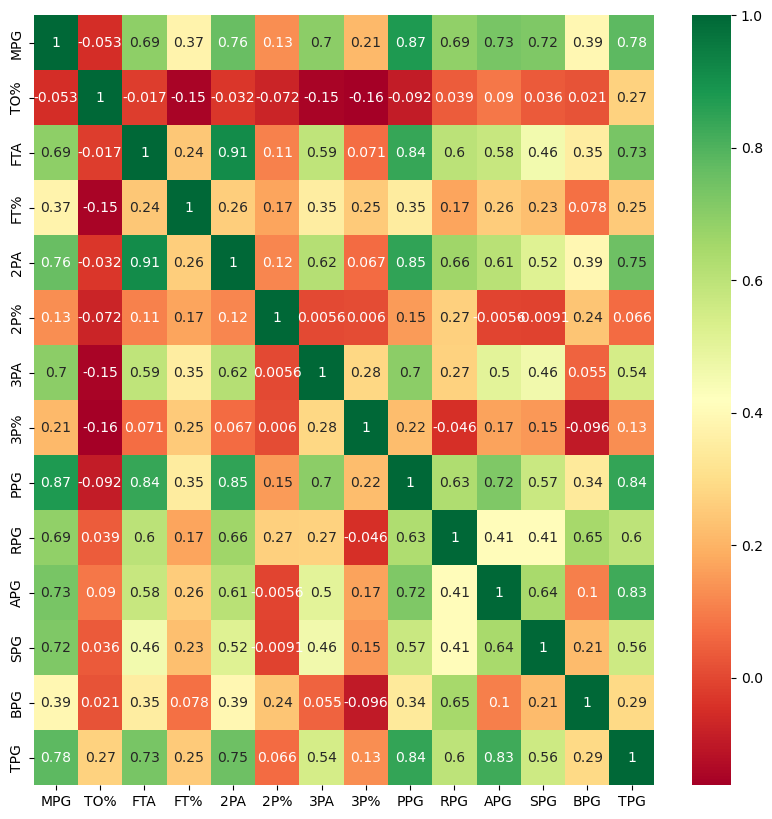

In [24]:
import seaborn as sns

yes = dfnba2022[['MPG', 'TO%', 'FTA','FT%', '2PA', '2P%', '3PA', '3P%', 'PPG', 'RPG', 'APG','SPG', 'BPG', 'TPG']]

fig = plt.figure(figsize=(10, 10))

sns.heatmap(yes.corr(), annot=True, cmap="RdYlGn")


In [97]:
nba_features = dfnba2024[['MPG', 'TO%', 'FTA','FT%', '2PA', '2P%', '3PA', '3P%', 'PPG', 'RPG', 'APG','SPG', 'BPG', 'TPG']]

scaler = StandardScaler()
xtrain_scaled = scaler.fit_transform(xtrain)
nba_features_scaled = scaler.transform(nba_features)

dt = DecisionTreeRegressor(max_depth=5, random_state=42)
dt.fit(xtrain_scaled, ytrain)

dfnba2024['Predicted_Rank'] = dt.predict(nba_features_scaled)

dfnba2024['Unique_Rank'] = dfnba2024['Predicted_Rank'].rank(ascending=True, method='min').astype(int)

nba_ranked = dfnba2024.sort_values(by='Unique_Rank').reset_index(drop=True)

for index, row in nba_ranked.iterrows():
    print(f"Rank: {row['Unique_Rank']}, Name: {row['NAME']}")


Rank: 1, Name: _0
Rank: 1, Name: _13
Rank: 1, Name: _11
Rank: 1, Name: _10
Rank: 1, Name: _9
Rank: 1, Name: _8
Rank: 1, Name: _7
Rank: 1, Name: _12
Rank: 1, Name: _5
Rank: 1, Name: _4
Rank: 1, Name: Gia_3
Rank: 1, Name: Shai _2
Rank: 1, Name: _1
Rank: 1, Name: _6
Rank: 15, Name: _27
Rank: 15, Name: _28
Rank: 15, Name: _29
Rank: 15, Name: _31
Rank: 15, Name: _34
Rank: 15, Name: _33
Rank: 15, Name: Kar_35
Rank: 15, Name: _36
Rank: 15, Name: _26
Rank: 15, Name: Ja_32
Rank: 15, Name: _25
Rank: 15, Name: _30
Rank: 15, Name: _23
Rank: 15, Name: _14
Rank: 15, Name: _24
Rank: 15, Name: _16
Rank: 15, Name: _17
Rank: 15, Name: _18
Rank: 15, Name: _15
Rank: 15, Name: _20
Rank: 15, Name: _21
Rank: 15, Name: _22
Rank: 15, Name: _19
Rank: 38, Name: B_52
Rank: 38, Name: Kri_51
Rank: 38, Name: _50
Rank: 38, Name: Vi_49
Rank: 38, Name: Ty_48
Rank: 38, Name: _47
Rank: 38, Name: _46
Rank: 38, Name: _45
Rank: 38, Name: _43
Rank: 38, Name: _42
Rank: 38, Name: _41
Rank: 38, Name: _40
Rank: 38, Name: _39
Ran

In [26]:
nba_ranked = dfnba2024.sort_values(by='Unique_Rank').reset_index(drop=True)

nba_ranked.to_csv('predicted_rank.csv', index=False)

print("Predicted rankings saved to 'predicted_rank.csv'")

Predicted rankings saved to 'predicted_rank.csv'


In [27]:
import pandas as pd

df = pd.read_csv('nba_statistic_2024_rank.csv')

if 'Rank' not in df.columns:
    df['Rank'] = None  
df['Rank'] = range(1, len(df) + 1)

df.to_csv('nba_statistic_24_25_ranked.csv', index=False)

print("Players have been ranked and the updated file is saved as 'nba_statistic_24_25_ranked.csv'.")


Players have been ranked and the updated file is saved as 'nba_statistic_24_25_ranked.csv'.


In [30]:
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

predicted_df = pd.read_csv('predicted_rank.csv')
actual_df = pd.read_csv('nba_statistic_24_25_ranked.csv')

predicted_names = predicted_df['NAME'].tolist()
actual_names = actual_df['NAME'].tolist()

common_names = set(predicted_names) & set(actual_names)

predicted_common = [name for name in predicted_names if name in common_names]
actual_common = [name for name in actual_names if name in common_names]

predicted_indices = [predicted_common.index(name) for name in common_names]
actual_indices = [actual_common.index(name) for name in common_names]

total_common = len(common_names)

tolerance = 30
within_tolerance = [
    abs(predicted_indices[i] - actual_indices[i]) <= tolerance
    for i in range(total_common)
]

correct_within_tolerance = sum(within_tolerance)
relaxed_accuracy = correct_within_tolerance / total_common if total_common > 0 else 0

mse = mean_squared_error(actual_indices, predicted_indices)
mae = mean_absolute_error(actual_indices, predicted_indices)
r2 = r2_score(actual_indices, predicted_indices)

print(f"Relaxed Accuracy (±{10}): {relaxed_accuracy:.2%}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")


Relaxed Accuracy (±10): 44.85%
Mean Squared Error (MSE): 7024.434782608696
Mean Absolute Error (MAE): 58.64530892448513
R-squared (R²): 0.651506368776783


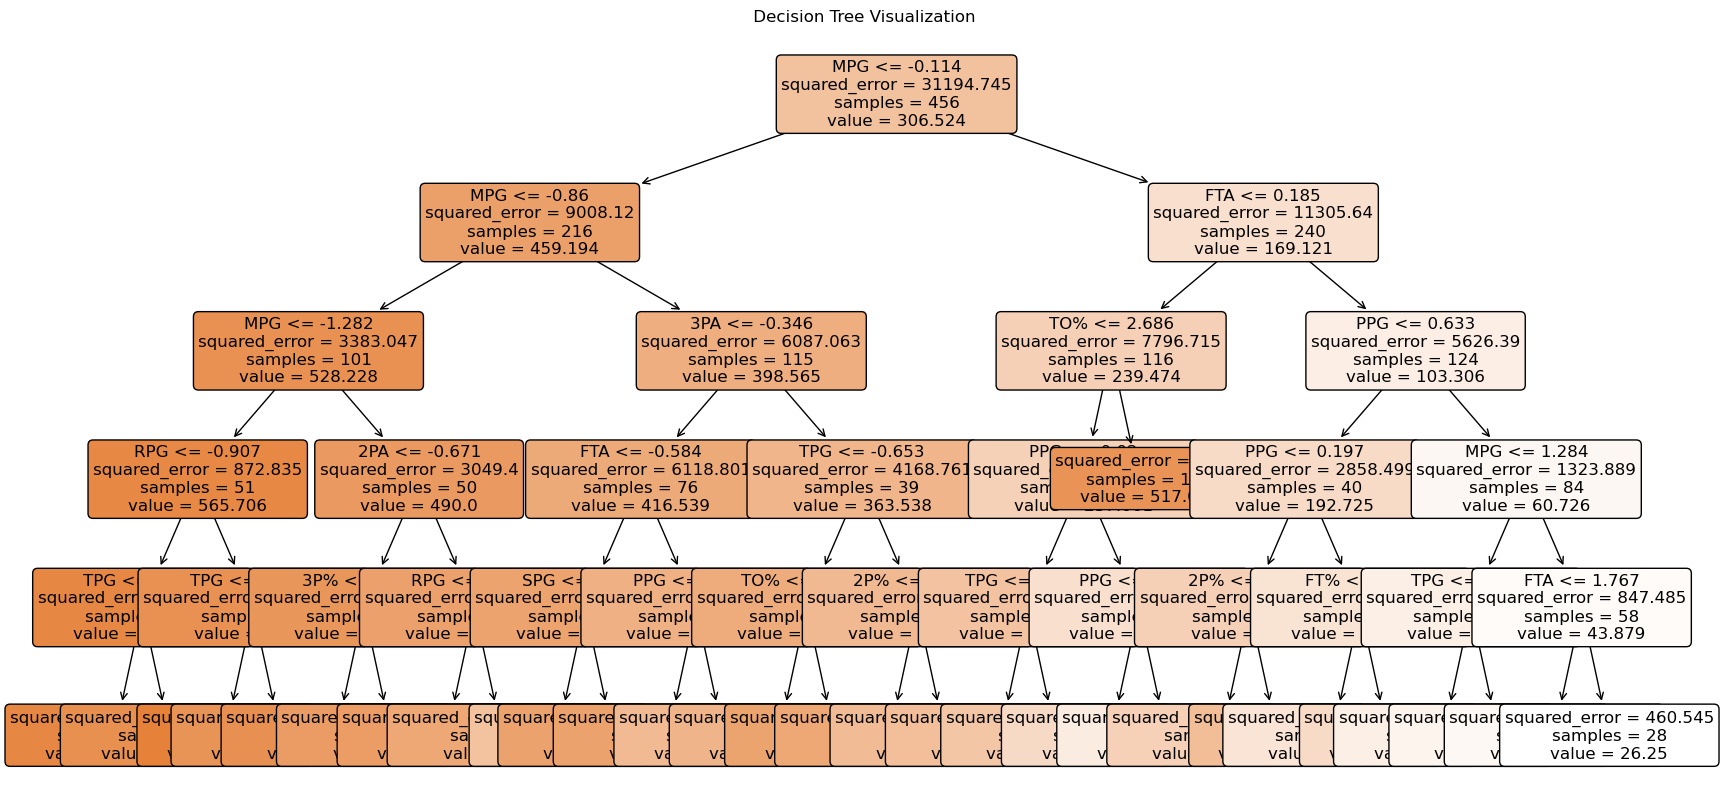

In [33]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

scaler = StandardScaler()
xtrain_scaled = scaler.fit_transform(xtrain)

dt = DecisionTreeRegressor(max_depth=5, max_features="sqrt", random_state=42)
dt.fit(xtrain_scaled, ytrain)

plt.figure(figsize=(20, 10))

plot_tree(
    dt, 
    feature_names=['MPG', 'TO%', 'FTA', 'FT%', '2PA', '2P%', '3PA', '3P%', 'PPG', 'RPG', 'APG', 'SPG', 'BPG', 'TPG'], 
    filled=True, 
    rounded=True, 
    fontsize=12
)
plt.title(" Decision Tree Visualization")
plt.show()


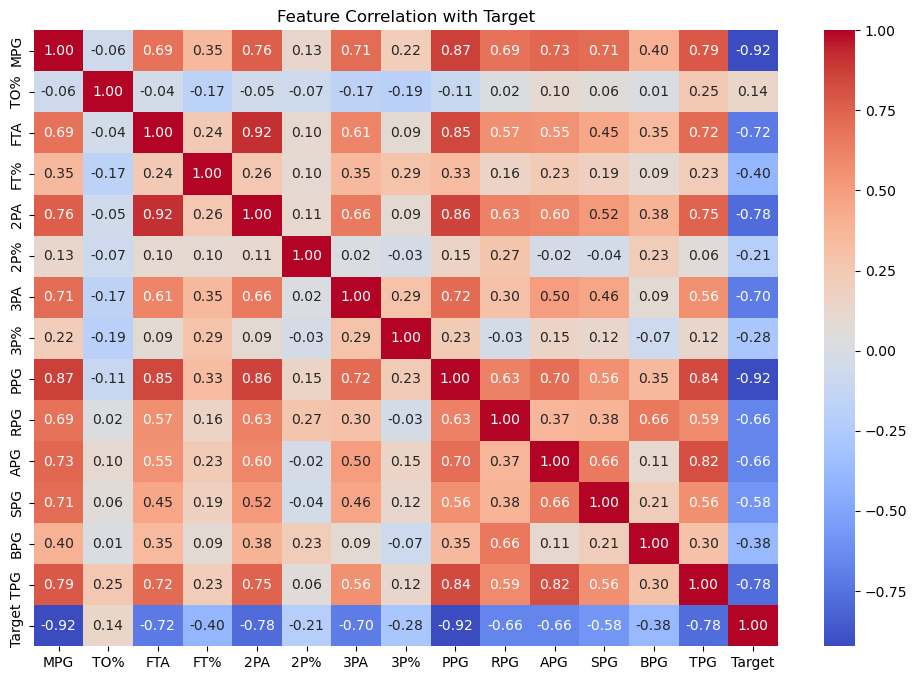

In [34]:
import seaborn as sns

features = ['MPG', 'TO%', 'FTA', 'FT%', '2PA', '2P%', '3PA', '3P%', 'PPG', 'RPG', 'APG', 'SPG', 'BPG', 'TPG']
df = pd.DataFrame(xtrain, columns=features)
df['Target'] = ytrain

correlation_matrix = df.corr()


plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Feature Correlation with Target")
plt.show()


In [35]:
model = model = KNeighborsRegressor(n_neighbors=5)
model.fit(xtrain, ytrain)

KNeighborsRegressor()

In [36]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median') 
xtrain_imputed = imputer.fit_transform(xtrain)
xtest_imputed = imputer.transform(xtest)
y_pred = model.predict(xtest_imputed)
mse = mean_squared_error(ytest, y_pred)

print("Mean Squared Error:", mse)


Mean Squared Error: 6100.352418300654


/Users/evanchang/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


In [37]:
x_predict = dfnba2024[['MPG', 'TO%', 'FTA','FT%', '2PA', '2P%', '3PA', '3P%', 'PPG', 'RPG', 'APG','SPG', 'BPG', 'TPG']]
predicted_rankings = model.predict(x_predict)

predicted_rankings_df = pd.DataFrame({
    'NAME': dfnba2024['NAME'], 
    'Predicted Rank': predicted_rankings.flatten() 
})

In [42]:
predicted_rankings_df_sorted = predicted_rankings_df.sort_values(by='Predicted Rank', ascending=True)

predicted_rankings_df_sorted['NAME'] = predicted_rankings_df_sorted['NAME'].apply(lambda x: x)

for index, row in predicted_rankings_df_sorted.iterrows():
    print(f"Rank: {row['Predicted Rank']}, NAME: {row['NAME']}")

predicted_rankings_df_sorted.to_csv('knn_ranked.csv', index=False)

print("Rankings saved to 'knn_ranked.csv'.")


Rank: 13.2, NAME: Giannis Antetokounmpo
Rank: 19.0, NAME: Shai Gilgeous-Alexander
Rank: 27.4, NAME: Paolo Banchero
Rank: 27.8, NAME: Anthony Edwards
Rank: 29.4, NAME: Luka Doncic
Rank: 31.8, NAME: DeMar DeRozan
Rank: 34.6, NAME: Damian Lillard
Rank: 34.8, NAME: Tyrese Maxey
Rank: 36.0, NAME: Kevin Durant
Rank: 36.0, NAME: Jalen Brunson
Rank: 38.2, NAME: Jayson Tatum
Rank: 40.4, NAME: Anthony Davis
Rank: 42.4, NAME: Mikal Bridges
Rank: 43.6, NAME: De'Aaron Fox
Rank: 48.2, NAME: Devin Booker
Rank: 48.8, NAME: Dejounte Murray
Rank: 49.0, NAME: Trae Young
Rank: 49.4, NAME: Jaylen Brown
Rank: 49.4, NAME: LeBron James
Rank: 50.4, NAME: Nikola Jokic
Rank: 51.0, NAME: Cade Cunningham
Rank: 51.2, NAME: Jaren Jackson Jr.
Rank: 53.6, NAME: Donovan Mitchell
Rank: 54.6, NAME: Kyle Kuzma
Rank: 55.6, NAME: Karl-Anthony Towns
Rank: 56.8, NAME: Stephen Curry
Rank: 58.2, NAME: Jalen Green
Rank: 60.6, NAME: Kawhi Leonard
Rank: 66.4, NAME: Collin Sexton
Rank: 66.4, NAME: Jerami Grant
Rank: 66.8, NAME: Jor

In [43]:
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

predicted_df = pd.read_csv('predicted_rank.csv')
actual_df = pd.read_csv('knn_ranked.csv')

predicted_df = predicted_df.sort_values(by='NAME').reset_index(drop=True)
actual_df = actual_df.sort_values(by='NAME').reset_index(drop=True)

aligned_df = pd.merge(predicted_df, actual_df, on='NAME', suffixes=('_predicted', '_actual'))

tolerance = 30
aligned_df['Within_Tolerance'] = (
    abs(aligned_df['Predicted Rank'] - aligned_df['Unique_Rank']) <= tolerance
)

total = len(aligned_df)
correct_within_tolerance = aligned_df['Within_Tolerance'].sum()
relaxed_accuracy = correct_within_tolerance / total if total > 0 else 0

mse = mean_squared_error(aligned_df['Unique_Rank'], aligned_df['Predicted Rank'])
mae = mean_absolute_error(aligned_df['Unique_Rank'], aligned_df['Predicted Rank'])
r2 = r2_score(aligned_df['Unique_Rank'], aligned_df['Predicted Rank'])

print(f"Relaxed Accuracy (±{10}): {relaxed_accuracy:.2%}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")


Relaxed Accuracy (±10): 31.84%
Mean Squared Error (MSE): 10914.2561745828
Mean Absolute Error (MAE): 75.94531450577664
R-squared (R²): 0.6415029453774208


In [45]:
#Linear Regression
from sklearn.linear_model import LinearRegression

data = LinearRegression()
data.fit(xtrain, ytrain)

LinearRegression()

In [48]:
imputer = SimpleImputer(strategy='mean')

features = ['MPG', 'TO%', 'FTA', 'FT%', '2PA', '2P%', '3PA', '3P%', 'PPG', 'RPG', 'APG', 'SPG', 'BPG', 'TPG']

dfnba2024[features] = imputer.fit_transform(dfnba2024[features])

xtrain = imputer.transform(xtrain)  
xtest = imputer.transform(xtest)  

x_predict = dfnba2024[features]
predicted_rankings = data.predict(x_predict)

predicted_rankings_df = pd.DataFrame({
    'NAME': dfnba2024['NAME'],  
    'Predicted Rank': predicted_rankings.flatten()
})

predicted_rankings_df_sorted = predicted_rankings_df.sort_values(by='Predicted Rank')

for index, row in predicted_rankings_df_sorted.iterrows():
    print(f"Rank: {row['Predicted Rank']:.2f}, NAME: {row['NAME']}")

Rank: -175.76, NAME: Joel Embiid
Rank: -142.20, NAME: Luka Doncic
Rank: -115.68, NAME: Kevin Durant
Rank: -75.66, NAME: Donovan Mitchell
Rank: -73.73, NAME: Devin Booker
Rank: -68.20, NAME: Kyrie Irving
Rank: -66.78, NAME: Shai Gilgeous-Alexander
Rank: -64.22, NAME: Jayson Tatum
Rank: -62.38, NAME: Tyrese Maxey
Rank: -61.70, NAME: Ja Morant
Rank: -60.09, NAME: Giannis Antetokounmpo
Rank: -57.54, NAME: Jalen Brunson
Rank: -55.24, NAME: Desmond Bane
Rank: -54.39, NAME: Stephen Curry
Rank: -52.92, NAME: Miles Bridges
Rank: -52.70, NAME: De'Aaron Fox
Rank: -47.09, NAME: Julius Randle
Rank: -44.91, NAME: Anthony Edwards
Rank: -44.26, NAME: Nikola Jokic
Rank: -40.18, NAME: Anthony Davis
Rank: -35.36, NAME: LeBron James
Rank: -33.40, NAME: Kawhi Leonard
Rank: -31.56, NAME: Anfernee Simons
Rank: -31.21, NAME: Terry Rozier
Rank: -23.25, NAME: Lauri Markkanen
Rank: -17.09, NAME: Kyle Kuzma
Rank: -14.30, NAME: Pascal Siakam
Rank: -14.11, NAME: Jaylen Brown
Rank: -10.47, NAME: Tyler Herro
Rank: -1

/Users/evanchang/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
/Users/evanchang/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


In [56]:
ytest_array = ytest.to_numpy().flatten()

mse = mean_squared_error(ytest_array, dt.predict(xtest))
mae = mean_absolute_error(ytest_array, dt.predict(xtest))
r2 = r2_score(ytest_array, dt.predict(xtest))

tolerance = 10
predicted_test = dt.predict(xtest)
within_tolerance = abs(predicted_test - ytest_array) <= tolerance
relaxed_accuracy = within_tolerance.mean()  

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")
print(f"Relaxed Accuracy (±{tolerance}): {relaxed_accuracy * 100:.2f}%")

Mean Squared Error (MSE): 36.17
Mean Absolute Error (MAE): 5.01
R² Score: 1.00
Relaxed Accuracy (±10): 92.16%


In [ ]:
#actual trade simulator

In [96]:
import pandas as pd

# Save Unique_Rank and NAME to a new file
trade_data = nba_ranked[['Unique_Rank', 'NAME']]

# Assign labels based on rank
def assign_label(rank):
    if rank <= 10:
        return "Superstar"
    elif rank <= 50:
        return "Starter"
    elif rank <= 150:
        return "Role Player"
    else:
        return "Bench"

trade_data['Label'] = trade_data['Unique_Rank'].apply(assign_label)
trade_data.to_csv('player_ranks_with_labels.csv', index=False)

# Load the data for the trade simulator
trade_df = pd.read_csv('player_ranks_with_labels.csv')

# Function to calculate the trade value for a list of players
def calculate_trade_value(players, trade_df):
    total_rank = 0
    player_values = []
    not_found = []
    
    for player in players:
        player_row = trade_df[trade_df['NAME'] == player]
        if not player_row.empty:
            rank = player_row.iloc[0]['Unique_Rank']
            label = player_row.iloc[0]['Label']
            total_rank += rank
            player_values.append((player, rank, label))
        else:
            not_found.append(player)
    
    return total_rank, player_values, not_found

# Trade simulator function
def trade_simulator(team1, team2, trade_df):
    # Calculate trade values for both teams
    team1_value, team1_players, team1_missing = calculate_trade_value(team1, trade_df)
    team2_value, team2_players, team2_missing = calculate_trade_value(team2, trade_df)
    
    # Display missing players if any
    if team1_missing:
        print(f"Players not found in team1: {', '.join(team1_missing)}")
    if team2_missing:
        print(f"Players not found in team2: {', '.join(team2_missing)}")
    
    # Display team values and players
    print("\nTeam 1:")
    for player, value, label in team1_players:
        print(f"  {player}: Rank = {value}, Label = {label}")
    print(f"Total Team 1 Value (Lower is Better): {team1_value}")
    
    print("\nTeam 2:")
    for player, value, label in team2_players:
        print(f"  {player}: Rank = {value}, Label = {label}")
    print(f"Total Team 2 Value (Lower is Better): {team2_value}")
    
    # Evaluate the trade
    print("\nTrade Result:")
    if team1_value < team2_value:
        print("Team 1 wins the trade!")
    elif team1_value > team2_value:
        print("Team 2 wins the trade!")
    else:
        print("The trade is perfectly balanced!")

# Example usage
team1 = ["LeBron James", "Anthony Davis"]  # Replace with actual names from your dataset
team2 = ["Stephen Curry", "Draymond Green"]  # Replace with actual names from your dataset

trade_simulator(team1, team2, trade_df)


Players not found in team1: LeBron James, Anthony Davis
Players not found in team2: Stephen Curry, Draymond Green

Team 1:
Total Team 1 Value (Lower is Better): 0

Team 2:
Total Team 2 Value (Lower is Better): 0

Trade Result:
The trade is perfectly balanced!


/var/folders/d7/8j2m3mnj5gl4nk3d11gz8vlr0000gn/T/ipykernel_85855/274822490.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trade_data['Label'] = trade_data['Unique_Rank'].apply(assign_label)
